In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns

In [ ]:
!wget --no-check-certificate 'https://www.dropbox.com/scl/fi/yd44nmfz1nh9xwwxdpf57/pb2_train.npz?rlkey=giclr1yni4h528pc9mtpf00si&dl=0' -O ./data_train.npz

--2024-02-29 20:20:57--  https://www.dropbox.com/scl/fi/yd44nmfz1nh9xwwxdpf57/pb2_train.npz?rlkey=giclr1yni4h528pc9mtpf00si&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0d811a183dde18f1357f3d2aa.dl.dropboxusercontent.com/cd/0/inline/CONfRk1S6GDtDkNgsckarGGxyI_pIPLStzwVxcHXJwm6KGsJTwfzlcN_kb85Dyi6pcITLdSy9RwS7GgTHJuqMLYgB3CQvpA-28PLjkQQdGG8Rh6uHa3VgMfhGAnfvw4mQdQk6-XbcK-mzjdvanJkJjKb/file# [following]
--2024-02-29 20:20:58--  https://ucc0d811a183dde18f1357f3d2aa.dl.dropboxusercontent.com/cd/0/inline/CONfRk1S6GDtDkNgsckarGGxyI_pIPLStzwVxcHXJwm6KGsJTwfzlcN_kb85Dyi6pcITLdSy9RwS7GgTHJuqMLYgB3CQvpA-28PLjkQQdGG8Rh6uHa3VgMfhGAnfvw4mQdQk6-XbcK-mzjdvanJkJjKb/file
Resolving ucc0d811a183dde18f1357f3d2aa.dl.dropboxusercontent.com (ucc0d811a183dde18f1357f3d2aa.dl.dropboxusercontent.com)... 162.125.6.15, 

In [ ]:
train_x = np.load('./data_train.npz')['x']
train_label = np.load('./data_train.npz')['y']
print(train_x.shape, train_label.shape)

(48000, 28, 28) (48000,)


Run the code block below instead of the previous block, only if the dataset is further split 90/10 to test the dataset after model training.

In [ ]:
# Load the data
data = np.load('./data_train.npz')['x']
train_label = np.load('./data_train.npz')['y']
print("Original shapes:", data.shape, train_label.shape)

# Split the data
total_samples = data.shape[0]
test_size = int(0.1 * total_samples)
train_size = total_samples - test_size

# Shuffle the data
indices = np.random.permutation(total_samples)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

train_data_split = data[train_indices]  # Training data
train_label_split = train_label[train_indices]
test_data_split = data[test_indices]     # Testing data
test_label_split = train_label[test_indices]

print("Train shapes:", train_data_split.shape, train_label_split.shape)
print("Test shapes:", test_data_split.shape, test_label_split.shape)

# Save the test data
np.savez_compressed('./data_test.npz', x=test_data_split, y=test_label_split)

# Save the training data
np.savez_compressed('./data_train2.npz', x=train_data_split, y=train_label_split)

Original shapes: (48000, 28, 28) (48000,)
Train shapes: (43200, 28, 28) (43200,)
Test shapes: (4800, 28, 28) (4800,)


Epoch 1/15, Train Loss: 0.7773, Val Loss: 0.5046, Val Acc: 0.8093
Epoch 2/15, Train Loss: 0.4837, Val Loss: 0.4234, Val Acc: 0.8535
Epoch 3/15, Train Loss: 0.4100, Val Loss: 0.3753, Val Acc: 0.8627
Epoch 4/15, Train Loss: 0.3678, Val Loss: 0.3419, Val Acc: 0.8778
Epoch 5/15, Train Loss: 0.3370, Val Loss: 0.3369, Val Acc: 0.8803
Epoch 6/15, Train Loss: 0.3151, Val Loss: 0.3278, Val Acc: 0.8824
Epoch 7/15, Train Loss: 0.3017, Val Loss: 0.3156, Val Acc: 0.8880
Epoch 8/15, Train Loss: 0.2834, Val Loss: 0.3035, Val Acc: 0.8928
Epoch 9/15, Train Loss: 0.2716, Val Loss: 0.2903, Val Acc: 0.8928
Epoch 10/15, Train Loss: 0.2589, Val Loss: 0.2998, Val Acc: 0.8896
Epoch 11/15, Train Loss: 0.2448, Val Loss: 0.2871, Val Acc: 0.9012
Epoch 12/15, Train Loss: 0.2356, Val Loss: 0.2725, Val Acc: 0.8988
Epoch 13/15, Train Loss: 0.2267, Val Loss: 0.2774, Val Acc: 0.8998
Epoch 14/15, Train Loss: 0.2145, Val Loss: 0.2647, Val Acc: 0.9046
Epoch 15/15, Train Loss: 0.2077, Val Loss: 0.2553, Val Acc: 0.9100


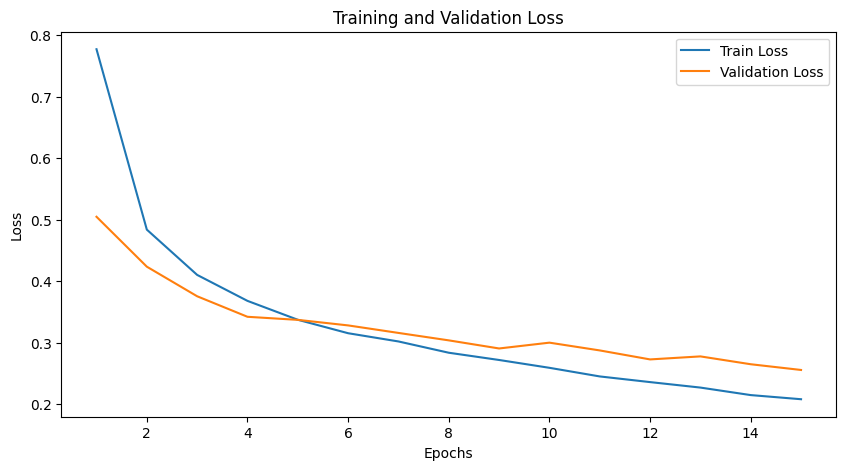

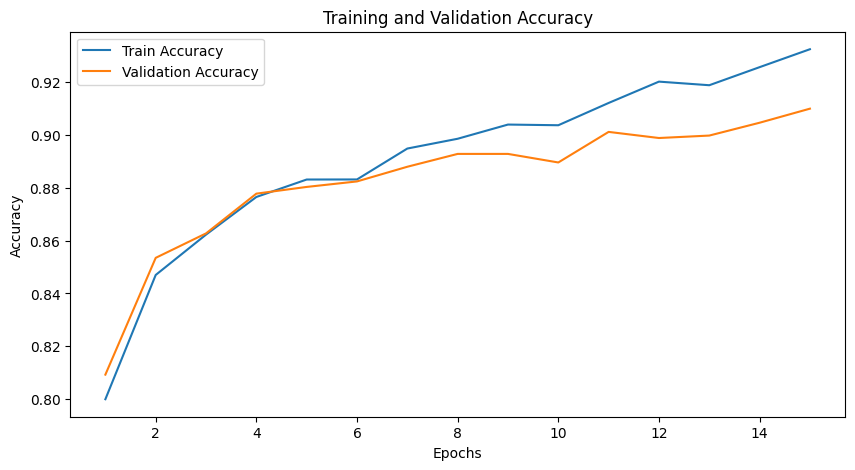

In [ ]:


# Defining the Network class

#MODEL 1
# class Network(nn.Module):
#     def __init__(self):
#         super(Network, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
#         self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#         self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
#         self.fc2 = nn.Linear(in_features=120, out_features=60)
#         self.out = nn.Linear(in_features=60, out_features=10)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.relu(x)
#         x = F.max_pool2d(x, kernel_size=2, stride=2)

#         x = self.conv2(x)
#         x = self.relu(x)
#         x = F.max_pool2d(x, kernel_size=2, stride=2)

#         x = x.view(-1, 12*4*4)

#         x = self.fc1(x)
#         x = self.relu(x)

#         x = self.fc2(x)
#         x = self.relu(x)

#         x = self.out(x)

#         return x

#MODEL 2 SELECTED MODEL
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=12*7*7, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 12*7*7)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.out(x)
        return x


#MODEL 3
# class Network(nn.Module):
#     def __init__(self):
#         super(Network, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(in_features=32*7*7, out_features=256)
#         self.fc2 = nn.Linear(in_features=256, out_features=128)
#         self.out = nn.Linear(in_features=128, out_features=10)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

#     def forward(self, x):
#         x = self.pool(self.relu(self.conv1(x)))
#         x = self.pool(self.relu(self.conv2(x)))
#         x = x.view(-1, 32*7*7)
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.out(x)
#         return x

#MODEL 4
# class Network(nn.Module):
#     def __init__(self):
#         super(Network, self).__init__()
#         self.fc1 = nn.Linear(28*28, 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 10)
#         self.relu = nn.ReLU()
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, x):
#         x = x.view(-1, 28*28)
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.fc3(x)
#         x = self.softmax(x)
#         return x

#MODEL 5
# class Network(nn.Module):
#     def __init__(self):
#         super(Network, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
#         self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#         self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
#         self.fc2 = nn.Linear(in_features=120, out_features=60)
#         self.out = nn.Linear(in_features=60, out_features=10)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.5)  # Adding dropout with 50% probability

#         # Batch normalization layers
#         self.bn1 = nn.BatchNorm2d(6)
#         self.bn2 = nn.BatchNorm2d(12)


#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = self.relu(x)
#         x = F.max_pool2d(x, kernel_size=2, stride=2)

#         x = self.conv2(x)
#         x = self.bn2(x)
#         x = self.relu(x)
#         x = F.max_pool2d(x, kernel_size=2, stride=2)

#         x = x.view(-1, 12*4*4)
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.dropout(x)  # Applying dropout
#         x = self.fc2(x)
#         x = self.relu(x)
#         x = self.dropout(x)  # Applying dropout

#         x = self.out(x)
#         return x

#MODEL 6
# class Network(nn.Module):
#     def _init_(self):
#         super(Network, self)._init_()
#         self.fc1 = nn.Linear(28*28, 512)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256, 10)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = x.view(-1, 28*28)
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# Load data
train_x = np.load('./data_train.npz')['x']
train_label = np.load('./data_train.npz')['y']
train_x = train_x / 255.0
train_x_tensor = torch.tensor(train_x).float()
train_label_tensor = torch.tensor(train_label).long()

# Create dataset and data loaders
dataset = TensorDataset(train_x_tensor, train_label_tensor)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_data, val_data = random_split(dataset, [train_size, val_size])

lr = 0.001
batch = 64
train_loader = DataLoader(train_data, batch_size=batch, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch, shuffle=True)

# Define model, loss function, and optimizer
model = Network()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training function
def train(model, train_loader, optimizer, loss_fn):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data.unsqueeze(1)) # Add channel dimension
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

# Validation function
def validate(model, val_loader, loss_fn):
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data.unsqueeze(1)) # Add channel dimension
            val_loss += loss_fn(output, target).item()
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    return val_loss / len(val_loader), correct / total

# Training loop
epochs = 15
train_losses = []
val_losses = []
train_accuracies = []  # New: To store training accuracies
val_accuracies = []

for epoch in range(epochs):
    train_loss = train(model, train_loader, optimizer, loss_fn)
    val_loss, val_acc = validate(model, val_loader, loss_fn)

    # Compute training accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in train_loader:
            output = model(data.unsqueeze(1)) # Add channel dimension
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    train_acc = correct / total  # Compute training accuracy

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)  # Append training accuracy only once
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Plot training and validation curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')  # New: Plot training accuracy
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()




In [ ]:

torch.save({
    'epoch': epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accuracies': train_accuracies,
    'val_accuracies': val_accuracies
}, 'nn_model.pth')


Test Accuracy: 0.9131


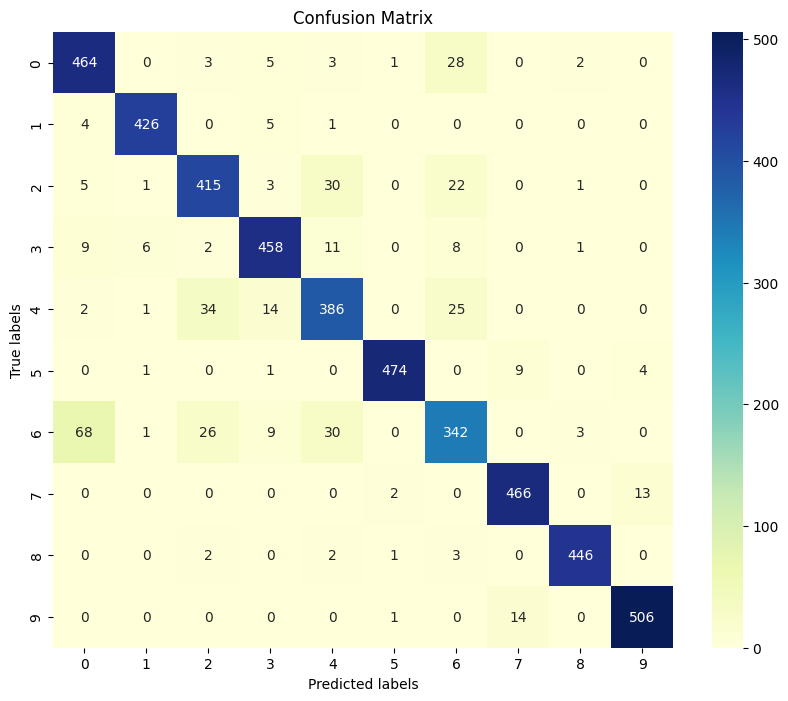

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       506
           1       0.98      0.98      0.98       436
           2       0.86      0.87      0.87       477
           3       0.93      0.93      0.93       495
           4       0.83      0.84      0.83       462
           5       0.99      0.97      0.98       489
           6       0.80      0.71      0.75       479
           7       0.95      0.97      0.96       481
           8       0.98      0.98      0.98       454
           9       0.97      0.97      0.97       521

    accuracy                           0.91      4800
   macro avg       0.91      0.91      0.91      4800
weighted avg       0.91      0.91      0.91      4800



In [ ]:
 # Test the model on the test set
test_x = np.load('./data_test.npz')['x']
test_label = np.load('./data_test.npz')['y']
test_x = test_x / 255.0
test_x_tensor = torch.tensor(test_x).float()
test_label_tensor = torch.tensor(test_label).long()

test_dataset = TensorDataset(test_x_tensor, test_label_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch, shuffle=False)

model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data.unsqueeze(1))
        _, predicted = torch.max(output, 1)
        test_total += target.size(0)
        test_correct += (predicted == target).sum().item()

test_accuracy = test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix
model.eval()
all_targets = []
all_predictions = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data.unsqueeze(1))
        _, predicted = torch.max(output, 1)
        all_targets.extend(target.tolist())
        all_predictions.extend(predicted.tolist())

conf_matrix = confusion_matrix(all_targets, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix

# Calculating the precision, recall, f1 score, and support
print(classification_report(all_targets, all_predictions))


